In [1]:
# 作業
#試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [2]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

In [3]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

In [13]:
# 設定需要計算的 K 值集合
range_n_cluster=[2,3,4,5,6]

For n_clusters = 2 The average silhouette_score is : 0.5027144446956527
For n_clusters = 3 The average silhouette_score is : 0.6105565451092732
For n_clusters = 4 The average silhouette_score is : 0.6270122040179333
For n_clusters = 5 The average silhouette_score is : 0.6115749260799671
For n_clusters = 6 The average silhouette_score is : 0.5499388428924794


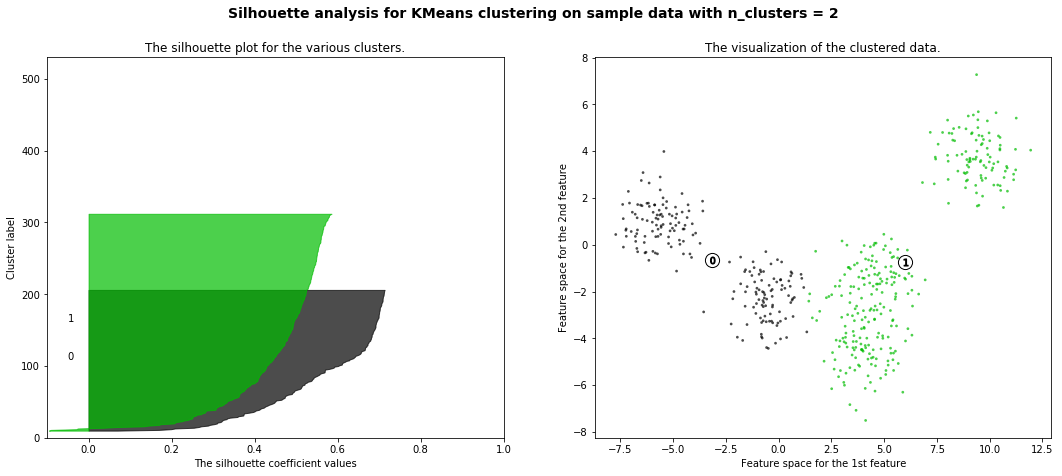

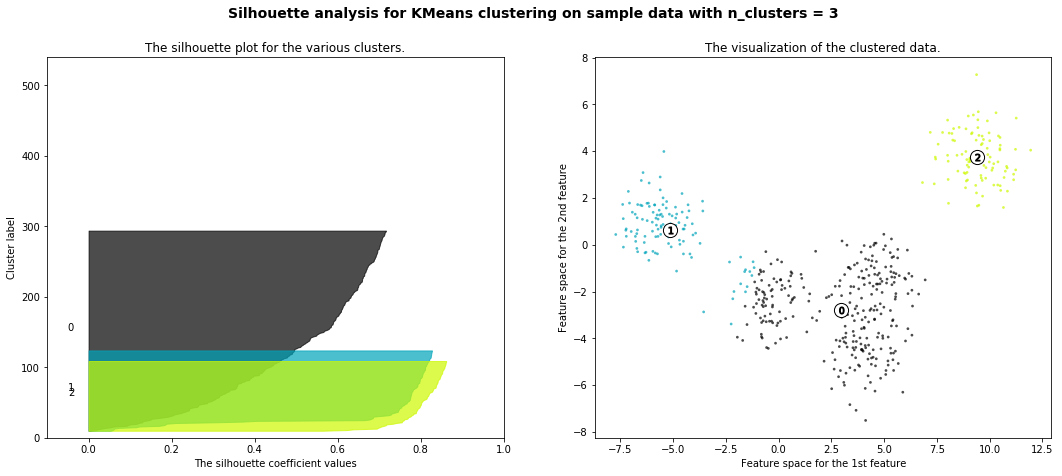

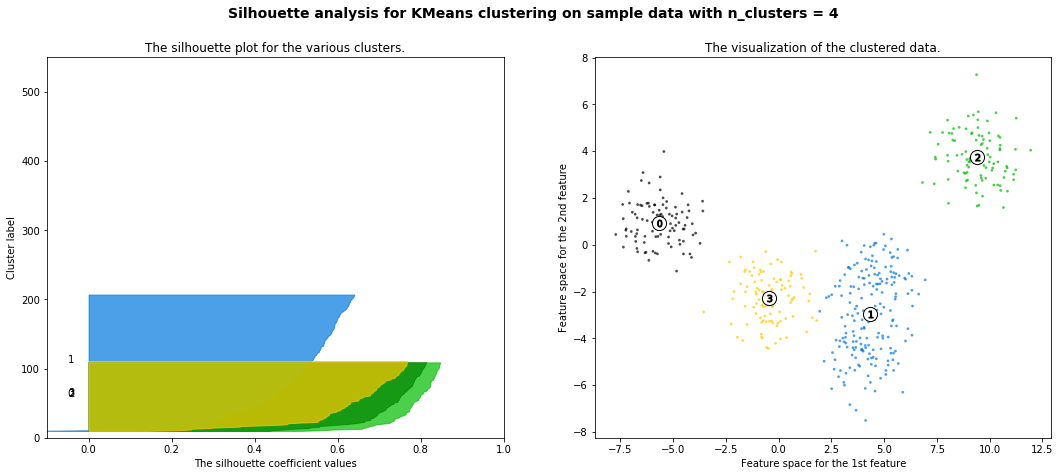

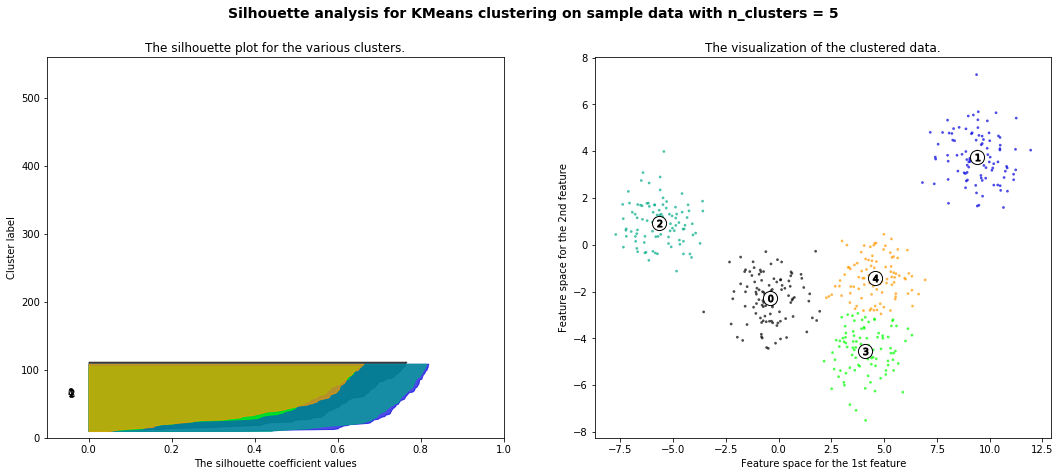

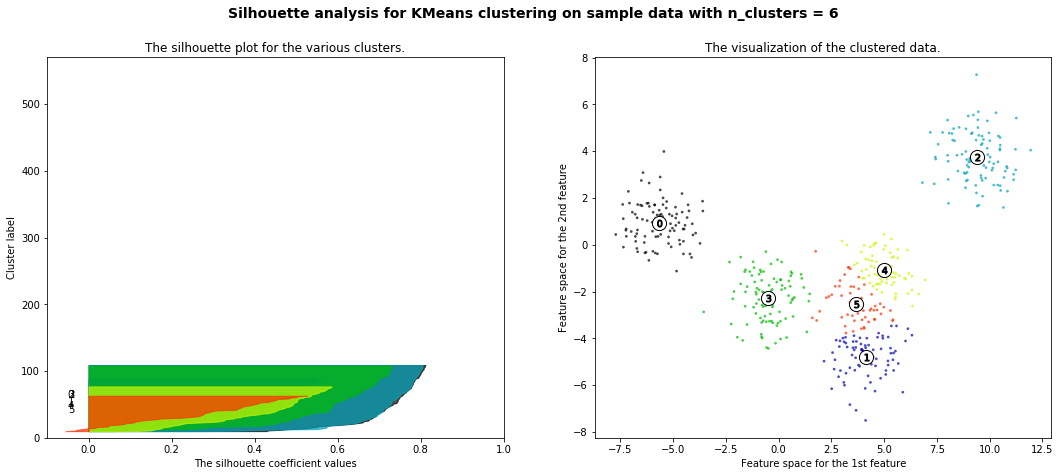

In [35]:
# 計算並繪製輪廓分析的結果
for n_clusters in range_n_cluster:
    fig, (ax1, ax2) = plt.subplots(1, 2) #一行容納兩個圖框
    fig.set_size_inches(18, 7)#重新調整圖框大小
    ax1.set_xlim([-0.1, 1]) #設置圖框X軸範圍
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10]) #設置Y軸的範圍
    clusterer = KMeans(n_clusters=n_clusters, random_state=10) #根據range_n_cluster的內容設定為幾群
    cluster_labels = clusterer.fit_predict(X) #擬合資料 只向給cluster_labels名稱
    silhouette_avg = silhouette_score(X, cluster_labels) #平均輪廓係數
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg) #印出各分群的分數 以資料顯示 分4群效果較佳
    sample_silhouette_values = silhouette_samples(X, cluster_labels) #將各分群的擬合後資料做衡量範圍
    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]#每個點的輪廓係數 符合range的  
        ith_cluster_silhouette_values.sort() #排序
        size_cluster_i=ith_cluster_silhouette_values.shape[0] #將數值的row指向給size_cluster_i
        y_upper = y_lower + size_cluster_i #合併數值
        
        color = cm.nipy_spectral(float(i) / n_clusters)  ##設置呈現顏色
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))##設置文字
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)  ##第二張圖的顏色
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')###
    centers = clusterer.cluster_centers_ #在每群的中間點標一個白色圈
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')#在每群的中間點標一個白色圈
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')  #將每群白色點中設置編號順序
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()